In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import keras.backend as K
from keras.models import Model, Input
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import merge
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, LSTM
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers

Using TensorFlow backend.


### Данные:
* **AAPL** https://finance.yahoo.com/quote/AAPL/history?p=AAPL&.tsrc=fin-srch
* **MSFT** https://finance.yahoo.com/quote/MSFT/history?p=MSFT&.tsrc=fin-srch

In [2]:
AAPL_PATH = "/mnt/data/home/probachaydmitry/Downloads/AAPL.csv"
MSFT_PATH = "/mnt/data/home/probachaydmitry/Downloads/MSFT.csv"

In [3]:
aapl_data = pd.read_csv(AAPL_PATH)[::-1]
msft_data = pd.read_csv(MSFT_PATH)[::-1]

In [4]:
aapl_data

,Date,Open,High,Low,Close,Adj Close,Volume
4778,2019-03-22,195.339996,197.690002,190.779999,191.050003,191.050003,42359300
4777,2019-03-21,190.020004,196.330002,189.809998,195.089996,195.089996,51034200
4776,2019-03-20,186.229996,189.490005,184.729996,188.160004,188.160004,31035200
4775,2019-03-19,188.350006,188.990005,185.919998,186.529999,186.529999,31646400
4774,2019-03-18,185.800003,188.389999,185.789993,188.020004,188.020004,26219800
4773,2019-03-15,184.850006,187.330002,183.740005,186.119995,186.119995,39042900
4772,2019-03-14,183.899994,184.100006,182.559998,183.729996,183.729996,23579500
4771,2019-03-13,182.250000,183.300003,180.919998,181.710007,181.710007,31032500
4770,2019-03-12,180.000000,182.669998,179.369995,180.910004,180.910004,32467600
4769,2019-03-11,175.490005,179.119995,175.350006,178.899994,178.899994,32011000


In [5]:
msft_data

,Date,Open,High,Low,Close,Adj Close,Volume
4778,2019-03-22,119.500000,119.589996,117.040001,117.050003,117.050003,33619100
4777,2019-03-21,117.139999,120.820000,117.089996,120.220001,120.220001,29854400
4776,2019-03-20,117.389999,118.750000,116.709999,117.519997,117.519997,28113300
4775,2019-03-19,118.089996,118.440002,116.989998,117.650002,117.650002,37588700
4774,2019-03-18,116.169998,117.610001,116.050003,117.570000,117.570000,31207600
4773,2019-03-15,115.339996,117.250000,114.589996,115.910004,115.910004,54681100
4772,2019-03-14,114.540001,115.199997,114.330002,114.589996,114.589996,30763400
4771,2019-03-13,114.129997,115.000000,113.779999,114.500000,114.500000,35513800
4770,2019-03-12,112.820000,113.989998,112.650002,113.620003,113.620003,26132700
4769,2019-03-11,110.989998,112.949997,110.980003,112.830002,112.830002,26491600


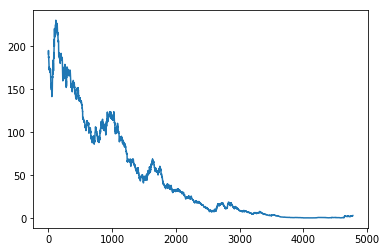

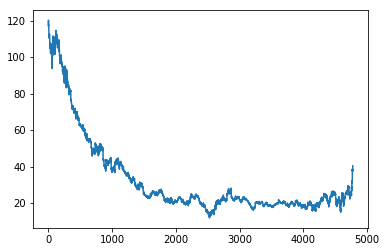

In [6]:
def plt_data(data):
    """Строит pyplot график.
    
        Parameters
        ----------
        data : pandas.core.frame.DataFrame
               Данные в формате сайта finance.yahoo.com
    """
    close_price = data.loc[:, 'Adj Close'].tolist()
    plt.plot(close_price)
    plt.show()

plt_data(aapl_data)
plt_data(msft_data)

In [7]:
def create_windows(finance_data, company_names, window=60, forecast=1, step=1, test_size=0.25, random_state=666):
    '''kakacode
    
        Parameters
        ----------
        finance_data : pandas.core.frame.DataFrame
                       Данные в формате сайта finance.yahoo.com
        window       : int                             (default 30)
                       Размер окна 
        forecast     : int                              (default 1)
                       Промежуток через который будем пердсказывать
        step         : int                              (default 1)
                       Ifu
                       
                       
    '''
    X, ys = [], []
    data_list = [df.loc[:, 'Adj Close'].tolist() for df in finance_data]
    for i in range(0, len(data_list[0]) - forecast - window, step):
        x, y = [], []
            
        for data in data_list:
            x_i = data[i:i+window]
            y_i = data[i+window+forecast]  

            last_close = x_i[window-1]
            next_close = y_i
            if last_close < next_close:
                y_i = [1]
            else:
                y_i = [0] 
            x_i = (np.array(x_i) - np.mean(x_i)) / np.std(x_i)
            x.append(x_i)
            y.append(y_i)
        
        x = [[x[c_i][w_i] for c_i in range(len(data_list))] for w_i in range(window)]
        X.append(x)
        ys.append(y)
    
    X, ys = np.array(X), np.array(ys)
    X_train, X_test, y_train, y_test = train_test_split(X, ys, test_size=test_size, random_state=random_state)
    
    y_train = {company_names[c_i]:np.array([[y_train[i][c_i][w_i] for w_i in range(1)] for i in range(len(y_train))]) for c_i in range(len(company_names))} 
    y_test = {company_names[c_i]:np.array([[y_test[i][c_i][w_i] for w_i in range(1)] for i in range(len(y_test))]) for c_i in range(len(company_names))} 
    
    return X_train, X_test, y_train, y_test

#company_names = ["aapl"]
#company_datas = [aapl_data]

company_names =  ["aapl", "msft"]  
company_datas =  [aapl_data, msft_data] 
X_train, X_test, y_train, y_test = create_windows(company_datas, company_names)

In [8]:
def create_dense_model(company_names, input_day = 60):
    K.clear_session()
    
    input_model = Input(name="input", shape=(input_day, len(company_names), ))
    base = Dense(64, activity_regularizer=regularizers.l2(0.01))(input_model)
    base = BatchNormalization()(base)
    base = LeakyReLU()(base)
    base = Dropout(0.5)(base)
    base = Flatten()(base)
    
    outputs = []
    loss_weights={}
    loss={}
    for i in range(len(company_names)):
        x = Dense(32, activity_regularizer=regularizers.l2(0.01))(base)
        x = Dropout(0.3)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dense(1)(x)
        x = Activation('sigmoid', name=company_names[i])(x)
        
        outputs.append(x)
        loss_weights[company_names[i]] = 1.0
        loss[company_names[i]] = 'binary_crossentropy'
    
    model = Model(input=input_model, outputs=outputs)
    
    opt = 'rmsprop'
    model.compile(optimizer=opt, 
                  loss=loss,
                  loss_weights=loss_weights,
                  metrics=['acc'])
    
    return model

model = create_dense_model(company_names)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [9]:
def create_lstm_model(company_names, input_day = 60):
    K.clear_session()
    
    input_model = Input(name="input", shape=(input_day, len(company_names), ))
    base = LSTM(30, return_sequences=True)(input_model)
    base = LSTM(30)(base)
    base = BatchNormalization()(base)
    base = LeakyReLU()(base)
    base = Dropout(0.5)(base)
    
    outputs = []
    loss_weights={}
    loss={}
    for i in range(len(company_names)):
        x = Dense(32, activity_regularizer=regularizers.l2(0.01))(base)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dense(1)(x)
        x = Activation('sigmoid', name=company_names[i])(x)
        
        outputs.append(x)
        loss_weights[company_names[i]] = 1.0
        loss[company_names[i]] = 'binary_crossentropy'
    
    model = Model(input=input_model, outputs=outputs)
    
    opt = 'rmsprop'
    model.compile(optimizer=opt, 
                  loss=loss,
                  loss_weights=loss_weights,
                  metrics=['acc'])
    
    return model

model = create_lstm_model(company_names)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


In [10]:
def a():
    model_m = Sequential()
    model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
    model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
    model_m.add(Conv1D(100, 10, activation='relu'))
    model_m.add(MaxPooling1D(3))
    model_m.add(Conv1D(160, 10, activation='relu'))
    model_m.add(Conv1D(160, 10, activation='relu'))
    model_m.add(GlobalAveragePooling1D())
    model_m.add(Dropout(0.5))
    model_m.add(Dense(num_classes, activation='softmax'))
    print(model_m.summary())

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="test.hdf5", verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, 
          epochs = 100, 
          batch_size = 128, 
          verbose=1,
          validation_split=0.25,
          callbacks=[reduce_lr, checkpointer],
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 2653 samples, validate on 885 samples
Epoch 1/100
2653/2653 [==============================] - 2s 849us/step - loss: 30.3117 - aapl_loss: 0.7995 - msft_loss: 0.8030 - aapl_acc: 0.4949 - msft_acc: 0.5077 - val_loss: 7.4423 - val_aapl_loss: 0.7123 - val_msft_loss: 0.6979 - val_aapl_acc: 0.4780 - val_msft_acc: 0.4994

Epoch 00001: val_loss improved from inf to 7.44234, saving model to test.hdf5


/usr/local/lib64/python3.6/site-packages/keras/callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_aapl_loss,val_msft_loss,val_aapl_acc,val_msft_acc,loss,aapl_loss,msft_loss,aapl_acc,msft_acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
2653/2653 [==============================] - 1s 299us/step - loss: 9.2437 - aapl_loss: 0.7687 - msft_loss: 0.7749 - aapl_acc: 0.5002 - msft_acc: 0.5205 - val_loss: 10.1900 - val_aapl_loss: 0.7975 - val_msft_loss: 0.7627 - val_aapl_acc: 0.4599 - val_msft_acc: 0.5006

Epoch 00002: val_loss did not improve from 7.44234
Epoch 3/100
2653/2653 [==============================] - 1s 307us/step - loss: 2.8474 - aapl_loss: 0.7426 - msft_loss: 0.7373 - aapl_acc: 0.5198 - msft_acc: 0.5006 - val_loss: 8.8753 - val_aapl_loss: 0.7605 - val_msft_loss: 0.8243 - val_aapl_acc: 0.4599 - val_msft_acc: 0.5006

Epoch 00003: val_loss did not improve from 7.44234
Epoch 4/100
2653/2653 [==============================] - 1s 309us/step - loss: 1.9360 - aapl_loss: 0.7439 - msft_loss: 0.7307 - aapl_acc: 0.5081 - msft_acc: 0.5062 - val_loss: 6.3259 - val_aapl_loss: 0.7362 - val_msft_loss: 0.7924 - val_aapl_acc: 0.4599 - val_msft_acc: 0.5006

Epoch 00004: val_loss improved from 7.44234 to 6.32591, saving 

2653/2653 [==============================] - 1s 274us/step - loss: 1.3972 - aapl_loss: 0.6898 - msft_loss: 0.6928 - aapl_acc: 0.5443 - msft_acc: 0.5168 - val_loss: 3.0376 - val_aapl_loss: 0.7102 - val_msft_loss: 0.7433 - val_aapl_acc: 0.5412 - val_msft_acc: 0.4994

Epoch 00026: val_loss improved from 3.37536 to 3.03764, saving model to test.hdf5
Epoch 27/100
2653/2653 [==============================] - 1s 273us/step - loss: 1.3963 - aapl_loss: 0.6890 - msft_loss: 0.6935 - aapl_acc: 0.5488 - msft_acc: 0.5100 - val_loss: 3.4114 - val_aapl_loss: 0.7511 - val_msft_loss: 0.7245 - val_aapl_acc: 0.4599 - val_msft_acc: 0.4994

Epoch 00027: val_loss did not improve from 3.03764
Epoch 28/100
2653/2653 [==============================] - 1s 309us/step - loss: 1.3944 - aapl_loss: 0.6892 - msft_loss: 0.6924 - aapl_acc: 0.5443 - msft_acc: 0.5198 - val_loss: 2.7471 - val_aapl_loss: 0.6932 - val_msft_loss: 0.7301 - val_aapl_acc: 0.5412 - val_msft_acc: 0.4994

Epoch 00028: val_loss improved from 3.03764

2653/2653 [==============================] - 1s 273us/step - loss: 1.3827 - aapl_loss: 0.6879 - msft_loss: 0.6913 - aapl_acc: 0.5424 - msft_acc: 0.5330 - val_loss: 2.1626 - val_aapl_loss: 0.6958 - val_msft_loss: 0.7248 - val_aapl_acc: 0.4859 - val_msft_acc: 0.4994

Epoch 00050: val_loss did not improve from 2.07508
Epoch 51/100
2653/2653 [==============================] - 1s 271us/step - loss: 1.3833 - aapl_loss: 0.6889 - msft_loss: 0.6908 - aapl_acc: 0.5401 - msft_acc: 0.5364 - val_loss: 1.9884 - val_aapl_loss: 0.7126 - val_msft_loss: 0.7176 - val_aapl_acc: 0.5401 - val_msft_acc: 0.4983

Epoch 00051: val_loss improved from 2.07508 to 1.98841, saving model to test.hdf5
Epoch 52/100
2653/2653 [==============================] - 1s 272us/step - loss: 1.3826 - aapl_loss: 0.6887 - msft_loss: 0.6905 - aapl_acc: 0.5432 - msft_acc: 0.5288 - val_loss: 1.7951 - val_aapl_loss: 0.6906 - val_msft_loss: 0.6955 - val_aapl_acc: 0.5401 - val_msft_acc: 0.5175

Epoch 00052: val_loss improved from 1.98841

2653/2653 [==============================] - 1s 270us/step - loss: 1.3786 - aapl_loss: 0.6865 - msft_loss: 0.6900 - aapl_acc: 0.5473 - msft_acc: 0.5296 - val_loss: 1.5227 - val_aapl_loss: 0.7411 - val_msft_loss: 0.6936 - val_aapl_acc: 0.4610 - val_msft_acc: 0.5141

Epoch 00074: val_loss did not improve from 1.52103
Epoch 75/100
2653/2653 [==============================] - 1s 271us/step - loss: 1.3787 - aapl_loss: 0.6876 - msft_loss: 0.6887 - aapl_acc: 0.5613 - msft_acc: 0.5386 - val_loss: 1.4570 - val_aapl_loss: 0.7052 - val_msft_loss: 0.6952 - val_aapl_acc: 0.4621 - val_msft_acc: 0.5198

Epoch 00075: val_loss improved from 1.52103 to 1.45703, saving model to test.hdf5
Epoch 76/100
2653/2653 [==============================] - 1s 349us/step - loss: 1.3779 - aapl_loss: 0.6866 - msft_loss: 0.6891 - aapl_acc: 0.5503 - msft_acc: 0.5330 - val_loss: 1.4718 - val_aapl_loss: 0.7120 - val_msft_loss: 0.7107 - val_aapl_acc: 0.4621 - val_msft_acc: 0.4994

Epoch 00076: val_loss did not improve from 

2653/2653 [==============================] - 1s 292us/step - loss: 1.3773 - aapl_loss: 0.6864 - msft_loss: 0.6889 - aapl_acc: 0.5503 - msft_acc: 0.5296 - val_loss: 1.4461 - val_aapl_loss: 0.6933 - val_msft_loss: 0.7224 - val_aapl_acc: 0.4949 - val_msft_acc: 0.4994

Epoch 00098: val_loss did not improve from 1.40800
Epoch 99/100
2653/2653 [==============================] - 1s 276us/step - loss: 1.3769 - aapl_loss: 0.6859 - msft_loss: 0.6892 - aapl_acc: 0.5522 - msft_acc: 0.5322 - val_loss: 1.4300 - val_aapl_loss: 0.6940 - val_msft_loss: 0.7072 - val_aapl_acc: 0.5311 - val_msft_acc: 0.5006

Epoch 00099: val_loss did not improve from 1.40800
Epoch 100/100
2653/2653 [==============================] - 1s 280us/step - loss: 1.3754 - aapl_loss: 0.6849 - msft_loss: 0.6883 - aapl_acc: 0.5545 - msft_acc: 0.5341 - val_loss: 1.4382 - val_aapl_loss: 0.6984 - val_msft_loss: 0.7174 - val_aapl_acc: 0.4633 - val_msft_acc: 0.5006

Epoch 00100: val_loss did not improve from 1.40800


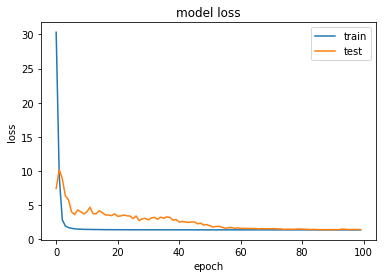

In [12]:
def explain_train(history):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    
explain_train(history)

In [13]:
model.evaluate(X_test, y_test, verbose=1)

1180/1180 [==============================] - 0s 181us/step


[1.408679790011907,
 0.6960593615548085,
 0.7069655113301034,
 0.49067796620271975,
 0.5169491531485219]

Обучать на высокочастотных данных (каждый час, каждые пять минут) — больше данных — больше паттернов — меньше переобучения
Использовать более продвинутые архитектуры нейронных сетей, которые предназначены для работы с последовательностями — convolutional neural networks, recurrent neural networks
Использовать не только цену закрытия, а все данные из нашего .csv (high, low, open, close, volume) — то есть в каждый момент времени обращать внимание на всю доступную информацию
Оптимизировать гиперпараметры — размер окна, количество нейронов в скрытых слоях, шаг обучения — все эти параметры были взяты несколько наугад, с помощью случайного поиска можно выяснить, что, возможно, нам надо смотреть на 45 дней назад и учить с меньшим шагом более глубокую сетку.
Использовать более подходящие для нашей задачи функции потерь (например, для прогнозирования изменения цены мы могли бы штрафовать нейронную за неправильный знак, обычная MSE к знаку числа инвариантна)

In [14]:
# https://habr.com/ru/company/wunderfund/blog/331310/

SyntaxError: invalid syntax (<ipython-input-14-4c12ce375257>, line 1)